## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import re

## Load Data

In [2]:
df = pd.read_csv('amazon.csv')
df.dropna(subset=['Text'], inplace=True)
df = df.reset_index(drop=True)

## Preprocess Text (lowercase, remove punctuation)

In [3]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

df['cleaned'] = df['Text'].apply(clean_text)

## TF-IDF Vectorization (uses built-in English stopwords)

In [4]:
vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(df['cleaned'])

## Choosing K using Silhouette Score

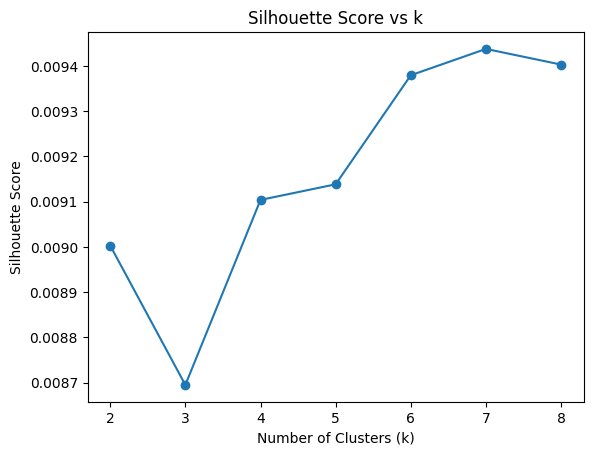

k=2: silhouette score = 0.0090
k=3: silhouette score = 0.0087
k=4: silhouette score = 0.0091
k=5: silhouette score = 0.0091
k=6: silhouette score = 0.0094
k=7: silhouette score = 0.0094
k=8: silhouette score = 0.0094


In [5]:
scores = []  
K_range = range(2, 9)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X)
    score = silhouette_score(X, preds)
    scores.append(score)

plt.plot(K_range, scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs k')
plt.show()

for k, score in zip(K_range, scores):
    print(f'k={k}: silhouette score = {score:.4f}')


## Final Clustering with Chosen k (k=5)

In [6]:
k_final = 5
model = KMeans(n_clusters=k_final, random_state=42)
df['cluster'] = model.fit_predict(X)

## Examine Top Terms in Each Cluster

In [7]:
terms = vectorizer.get_feature_names_out()
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
for i in range(k_final):
    print(f"\nCluster {i} top terms:")
    for ind in order_centroids[i, :10]:
        print(terms[ind])


Cluster 0 top terms:
use
easy
app
love
kindle
like
alarm
time
bible
works

Cluster 1 top terms:
great
app
works
love
kindle
like
free
just
time
use

Cluster 2 top terms:
game
fun
play
love
like
playing
time
really
games
good

Cluster 3 top terms:
app
love
free
kindle
like
dont
just
really
good
download

Cluster 4 top terms:
like
just
dont
love
kindle
time
work
good
really
does


## Show 2 sample reviews from each cluster


In [8]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(X)
df['cluster'] = labels

for i in range(5):
    print(f"\nCluster {i} Sample Reviews:")
    print(df[df['cluster'] == i]['Text'].iloc[:2].to_string(index=False))


Cluster 0 Sample Reviews:
Hey it's Angry Birds, what's not to love!  Easy...
I doundt think there should be a fee to use the...

Cluster 1 Sample Reviews:
This is definitely a great  to get my 6-year-ol...
This is great! This is my tried & true game to ...

Cluster 2 Sample Reviews:
This is a pretty good version of the game for b...
This is a silly game and can be frustrating, bu...

Cluster 3 Sample Reviews:
this is awesome and you don't need wi ti to pla...
this is by far the best free app that is availa...

Cluster 4 Sample Reviews:
This is  the best apps acording to a bunch of p...
this is a really . there are a bunch of levels ...
